# Scenario

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets].

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service.

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 33 columns (features).

The “Churn” column is our target.

Goals

* Using Supervised and Unsupervised Learning.
* Introduction of PCA proxies in Supervised Analysis.
* Develop an interactive Power BI dashboard to track customer churns.
* Recommendations on churn mitigation strategies.

# Data Pre-processing

## Data Import

In [3]:
### Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### Data loading

df_demographics = pd.read_excel('Telco_customer_churn_demographics.xlsx')
df_location = pd.read_excel('Telco_customer_churn_location.xlsx')
df_services = pd.read_excel('Telco_customer_churn_services.xlsx')
df_status = pd.read_excel('Telco_customer_churn_status.xlsx')

## Merge Data

In [5]:
### Merge function

def safe_merge(df_left, df_right):
    common_cols = set(df_left.columns) & set(df_right.columns) - {'Customer ID'}
    df_right_clean = df_right.drop(columns=common_cols)
    return df_left.merge(df_right_clean, on='Customer ID', how='outer')

df_merged = safe_merge(df_demographics, df_location)
df_merged = safe_merge(df_merged, df_services)
df_merged = safe_merge(df_merged, df_status)

In [6]:
### Merged data

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Gender                             7043 non-null   object 
 3   Age                                7043 non-null   int64  
 4   Under 30                           7043 non-null   object 
 5   Senior Citizen                     7043 non-null   object 
 6   Married                            7043 non-null   object 
 7   Dependents                         7043 non-null   object 
 8   Number of Dependents               7043 non-null   int64  
 9   Location ID                        7043 non-null   object 
 10  Country                            7043 non-null   object 
 11  State                              7043 non-null   objec

## Data Cleaning

In [7]:
## Checking duplicates

df_merged.duplicated().sum()

np.int64(0)

In [8]:
## Target distribution

df_merged['Churn Label'].value_counts(normalize=True)

,proportion
Churn Label,
No,0.73463
Yes,0.26537


In [9]:
## Checking nulls

df_merged.isna().sum()

,0
Customer ID,0
Count,0
Gender,0
Age,0
Under 30,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
Location ID,0


In [10]:
### Filling null values

df_merged['Offer'] = df_merged['Offer'].fillna('No')
df_merged['Internet Type'] = df_merged['Internet Type'].fillna('No')
df_merged['Churn Category'] = df_merged['Churn Category'].fillna('No')
df_merged['Churn Reason'] = df_merged['Churn Reason'].fillna('No')

In [11]:
### Dropping columns

cols_to_drop = ['Customer ID', 'Count', 'Under 30', 'Dependents',
                'Location ID', 'Country', 'State', 'Lat Long', 'City',
                'Zip Code', 'Latitude', 'Longitude', 'Service ID',
                'Quarter', 'Referred a Friend', 'Internet Service',
                'Status ID', 'Customer Status', 'Churn Label']

df_merged = df_merged.drop(columns=cols_to_drop)

In [12]:
### Official data

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

## Data Copies

In [13]:
### Copied Data

df_copied = df_merged.copy()

## Data Manipulation

### One-hot Encoding

In [14]:
### One-hot Encoding

df_encoded_v1 = pd.get_dummies(df_copied,
                               columns = df_copied.select_dtypes(include='object').columns.tolist(),
                               drop_first=True)

df_encoded_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 67 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Age                                                     7043 non-null   int64  
 1   Number of Dependents                                    7043 non-null   int64  
 2   Number of Referrals                                     7043 non-null   int64  
 3   Tenure in Months                                        7043 non-null   int64  
 4   Avg Monthly Long Distance Charges                       7043 non-null   float64
 5   Avg Monthly GB Download                                 7043 non-null   int64  
 6   Monthly Charge                                          7043 non-null   float64
 7   Total Charges                                           7043 non-null   float64
 8   Total Refunds                         

### Label encoding

In [15]:
### Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_encoded_v2 = df_copied.copy()

for col in df_encoded_v2.select_dtypes(include='object'):
    df_encoded_v2[col] = le.fit_transform(df_encoded_v2[col])

df_encoded_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int64  
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   int64  
 3   Married                            7043 non-null   int64  
 4   Number of Dependents               7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   int64  
 8   Phone Service                      7043 non-null   int64  
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   int64  
 11  Internet Type                      7043 non-null   int64

## Churn 1:0

In [16]:
### Split encoded data into churn value = 1 and churn value = 0

churn_1 = df_encoded_v1[df_encoded_v1['Churn Value'] == 1]
churn_0 = df_encoded_v1[df_encoded_v1['Churn Value'] == 0]

churn_1_v2 = df_encoded_v2[df_encoded_v2['Churn Value'] == 1]
churn_0_v2 = df_encoded_v2[df_encoded_v2['Churn Value'] == 0]

# Clustering

## First try using PCA

In [17]:
### Packages

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
### Scaling data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(churn_1)

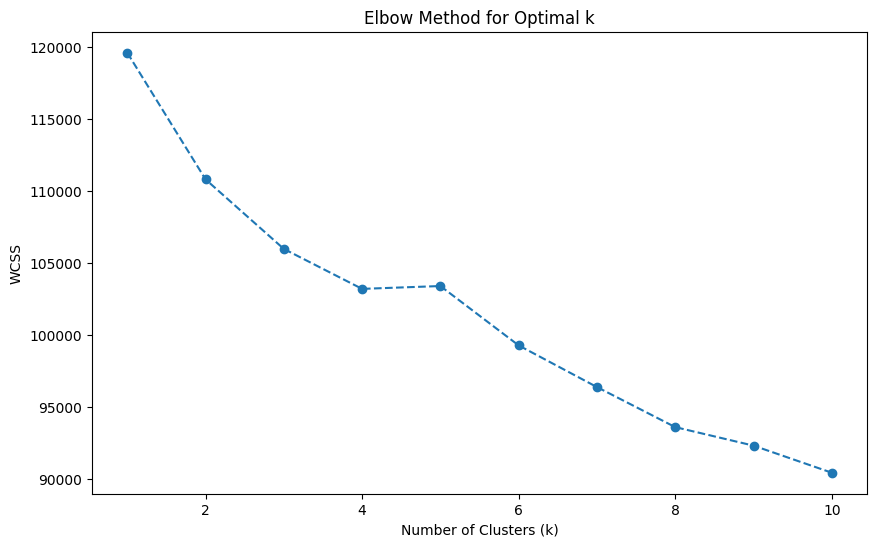

In [19]:
### Determine optimal number of clusters using the Elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

<ipython-input-20-7b947cb89092>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_1_v2['Cluster'] = kmeans.fit_predict(df_scaled)


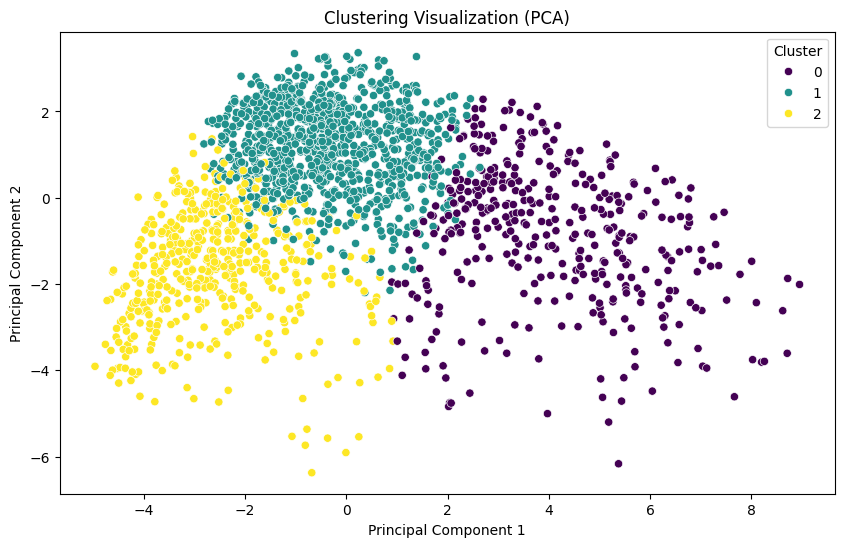

In [20]:
### Apply KMeans clustering with the chosen number of clusters

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
churn_1_v2['Cluster'] = kmeans.fit_predict(df_scaled)

### Visualize the clusters

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=churn_1_v2['Cluster'], palette='viridis')
plt.title('Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [21]:
### 3D plot clustering

import plotly.express as px

pca = PCA(n_components=3)
df_pca_3d = pca.fit_transform(df_scaled)

fig = px.scatter_3d(
    x = df_pca_3d[:, 0],
    y = df_pca_3d[:, 1],
    z = df_pca_3d[:, 2],
    color = churn_1_v2['Cluster'],
    title = '3D Clustering Visualization (PCA)',
    labels = {'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3'})

fig.show()

## Without PCA

In [22]:
churn_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7039
Data columns (total 67 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Age                                                     1869 non-null   int64  
 1   Number of Dependents                                    1869 non-null   int64  
 2   Number of Referrals                                     1869 non-null   int64  
 3   Tenure in Months                                        1869 non-null   int64  
 4   Avg Monthly Long Distance Charges                       1869 non-null   float64
 5   Avg Monthly GB Download                                 1869 non-null   int64  
 6   Monthly Charge                                          1869 non-null   float64
 7   Total Charges                                           1869 non-null   float64
 8   Total Refunds                              

In [23]:
### First Cluster

X1_clusters = churn_1.iloc[:, [0,1]].values

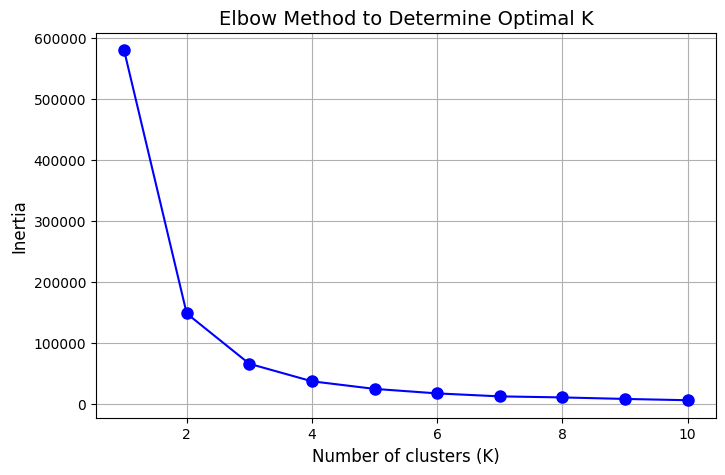

In [24]:
# Use the Elbow method to determine the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1_clusters)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method to Determine Optimal K', fontsize=14)
plt.grid(True)
plt.show()

In [25]:
kmeans_estimator_X1 = KMeans(n_clusters=3, init='k-means++', random_state=0)

k_clusters_X1 = kmeans_estimator_X1.fit(X1_clusters)

In [26]:
pointLabels_X1 = k_clusters_X1.labels_
clusterCenters_X1 = k_clusters_X1.cluster_centers_

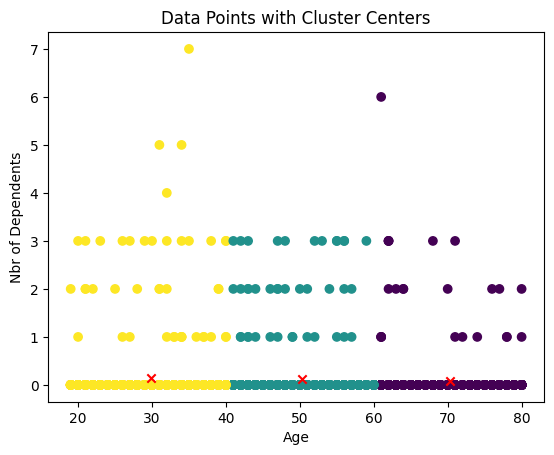

In [27]:
# Visualizing 2D clusters
plt.scatter(x =X1_clusters[:, 0], y= X1_clusters[:, 1],
            c=pointLabels_X1,)
plt.scatter(x =clusterCenters_X1[:,0], y= clusterCenters_X1[:,1],
            marker="x", c="r")
plt.title("Data Points with Cluster Centers")
plt.xlabel("Age")
plt.ylabel("Nbr of Dependents")
plt.show()

In [28]:
X2_clusters = churn_1.iloc[:, [4,5]].values

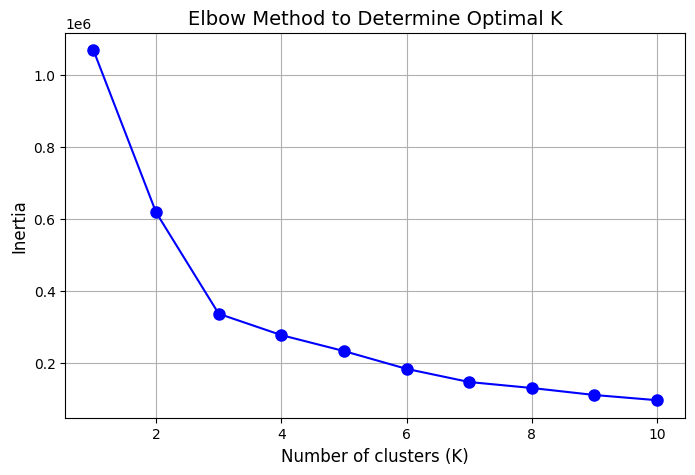

In [29]:
# Use the Elbow method to determine the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2_clusters)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method to Determine Optimal K', fontsize=14)
plt.grid(True)
plt.show()

In [30]:
kmeans_estimator_X2 = KMeans(n_clusters=3, init='k-means++', random_state=25)

k_clusters_X2 = kmeans_estimator_X2.fit(X2_clusters)

In [31]:
pointLabels_X2 = k_clusters_X2.labels_
clusterCenters_X2 = k_clusters_X2.cluster_centers_

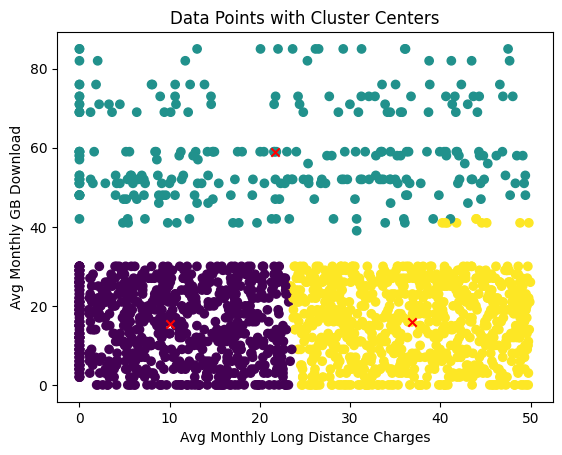

In [32]:
# Visualizing 2D clusters
plt.scatter(x =X2_clusters[:, 0], y= X2_clusters[:, 1],
            c=pointLabels_X2,)
plt.scatter(x =clusterCenters_X2[:,0], y= clusterCenters_X2[:,1],
            marker="x", c="r")
plt.title("Data Points with Cluster Centers")
plt.xlabel("Avg Monthly Long Distance Charges")
plt.ylabel("Avg Monthly GB Download")
plt.show()

In [33]:
X3_clusters = churn_1.iloc[:, [6,12]].values

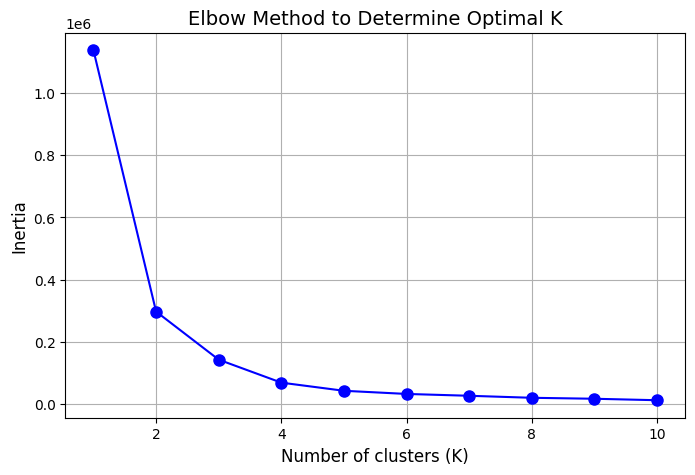

In [34]:
# Use the Elbow method to determine the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X3_clusters)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method to Determine Optimal K', fontsize=14)
plt.grid(True)
plt.show()

In [35]:
kmeans_estimator_X3 = KMeans(n_clusters=3, init='k-means++', random_state=0)

k_clusters_X3 = kmeans_estimator_X3.fit(X3_clusters)

In [36]:
pointLabels_X3 = k_clusters_X3.labels_
clusterCenters_X3 = k_clusters_X3.cluster_centers_

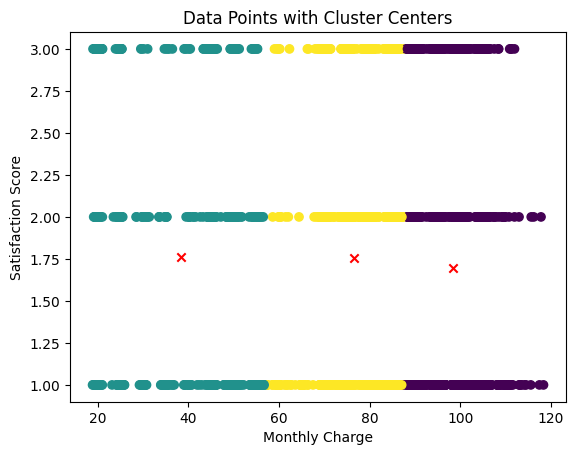

In [37]:
# Visualizing 2D clusters
plt.scatter(x =X3_clusters[:, 0], y= X3_clusters[:, 1],
            c=pointLabels_X3,)
plt.scatter(x =clusterCenters_X3[:,0], y= clusterCenters_X3[:,1],
            marker="x", c="r")
plt.title("Data Points with Cluster Centers")
plt.xlabel("Monthly Charge")
plt.ylabel("Satisfaction Score")
plt.show()

# Modelling

## Data Split

In [38]:
### Data split

from sklearn.model_selection import train_test_split

X = df_encoded_v2.drop('Churn Value', axis=1)
y = df_encoded_v2['Churn Value']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X, columns=df_encoded_v2.drop('Churn Value', axis=1).columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=25)

## Baseline Modelling

In [40]:
### Baseline model with KNN
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, knn_y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.73450070989115


## Logistic Regression

In [41]:
### Model train with Logistic Regression

from sklearn.linear_model import LogisticRegression

# Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Make predictions on the test set
log_y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, log_y_pred))
print("Accuracy:", accuracy_score(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1540
           1       0.91      0.85      0.88       573

    accuracy                           0.94      2113
   macro avg       0.93      0.91      0.92      2113
weighted avg       0.94      0.94      0.94      2113

Accuracy: 0.9375295787979177


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



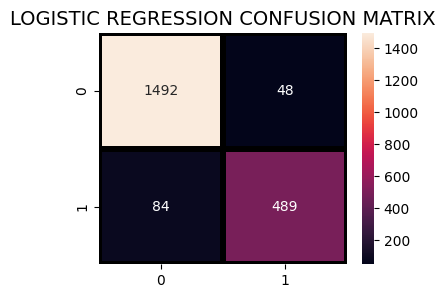

In [42]:
### Confusion Matrix

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, log_y_pred),
            annot=True, fmt = "d", linecolor="k", linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.show()

## XGBoost

In [43]:
### XGBoost Modelling

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

### Define the parameter grid for hyperparameter tuning

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an XGBoost classifier

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Use GridSearchCV to find the best hyperparameters

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train a new XGBoost model with the best hyperparameters

best_xgb_model = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=42)
best_xgb_model.fit(X_train, y_train)

# Make predictions with the best model

best_xgb_pred = best_xgb_model.predict(X_test)

# Evaluate the best model

best_xgb_accuracy = accuracy_score(y_test, best_xgb_pred)
print(f"Best XGBoost Accuracy: {best_xgb_accuracy}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validation Score: 1.0
Best XGBoost Accuracy: 1.0


In [45]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b474a88ec9b14c63d2e786c072635f1c0251104fee3436af8b2f8e3cf0c87dfd
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [46]:
### SHAP and LIME Interpret

import shap
import lime
import lime.lime_tabular

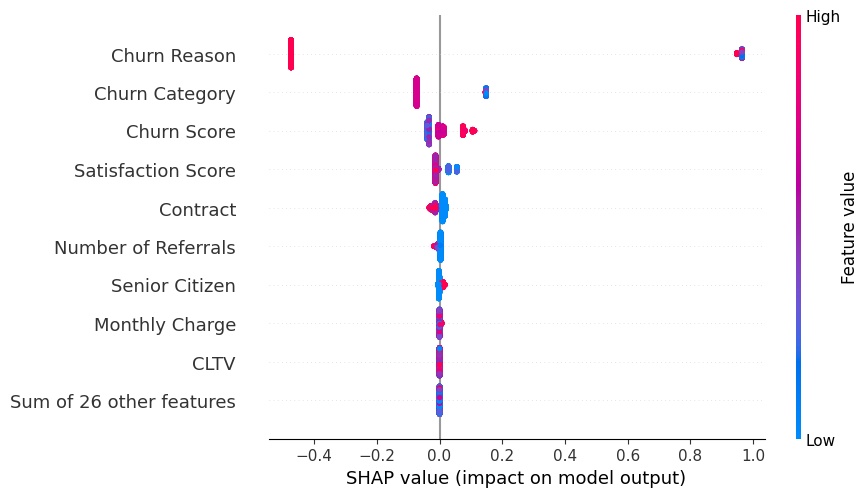

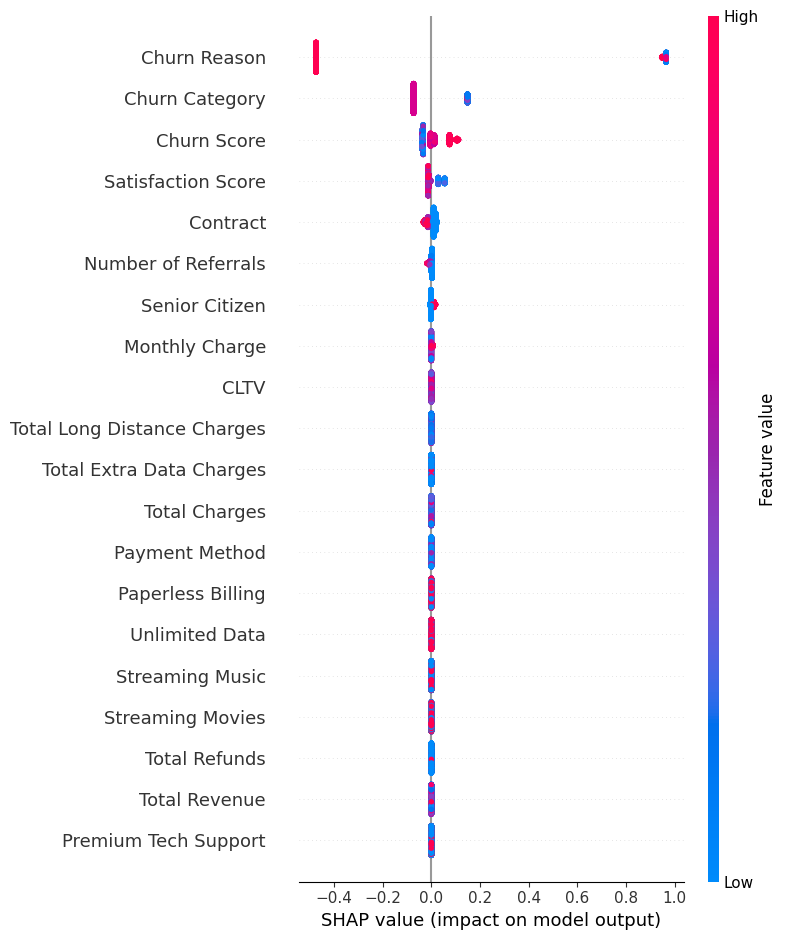

In [47]:
# SHAP values

explainer = shap.Explainer(best_xgb_model, X_train) # Use X_train for the explainer
shap_values = explainer(X_test)

# Visualize SHAP values

shap.plots.beeswarm(shap_values)
shap.summary_plot(shap_values, X_test)

In [48]:
# LIME

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['No Churn', 'Churn'],
    mode='classification'
)

In [49]:
# Explain a specific prediction

i = 10
exp = explainer.explain_instance(
    X_test.iloc[i].values,
    best_xgb_model.predict_proba,
    num_features=10
)
exp.show_in_notebook(show_table=True)

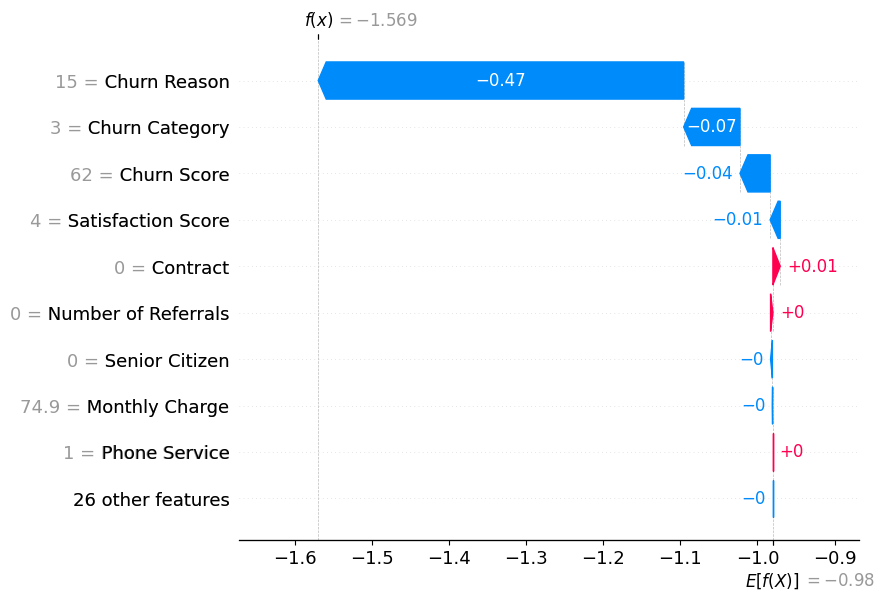

In [50]:
shap.plots.waterfall(shap_values[0])

# Modelling with PCA Proxies

In [51]:
df_encoded_v2.head()

,Gender,Age,Senior Citizen,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,0,37,0,1,0,2,9,0,1,42.39,...,0.00,0,381.51,974.81,3,0,65,2205,3,15
1,1,46,0,0,0,0,9,0,1,10.69,...,38.33,10,96.21,610.28,5,0,66,5414,3,15
2,1,50,0,0,0,0,4,5,1,33.65,...,0.00,0,134.60,415.45,1,1,71,4479,1,2
3,1,78,1,1,0,1,13,4,1,27.82,...,0.00,0,361.66,1599.51,1,1,91,3714,2,19
4,0,75,1,1,0,3,3,0,1,7.38,...,0.00,0,22.14,289.54,1,1,68,3464,2,14


In [52]:
df_encoded_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int64  
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   int64  
 3   Married                            7043 non-null   int64  
 4   Number of Dependents               7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   int64  
 8   Phone Service                      7043 non-null   int64  
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   int64  
 11  Internet Type                      7043 non-null   int64

## Services proxy

In [53]:
### Demographics columns

services_pca = ['Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
                'Avg Monthly Long Distance Charges', 'Multiple Lines',
                'Internet Type', 'Avg Monthly GB Download', 'Online Security',
                'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
                'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
                'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge',
                'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
                'Total Long Distance Charges', 'Total Revenue']

# Scale the selected features

scaler_pca = StandardScaler()
features_scaled = scaler_pca.fit_transform(df_encoded_v2[services_pca])

# Apply PCA to extract the first principal component

pca = PCA(n_components=1)
first_component = pca.fit_transform(features_scaled)

# Add the first principal component as a new variable to your DataFrame

df_encoded_v2['Services_PCA_Component'] = first_component

df_services_pca = df_encoded_v2.drop(columns=services_pca)

# Now df_encoded contains the new variable 'First_PCA_Component'

df_services_pca.head()

,Gender,Age,Senior Citizen,Married,Number of Dependents,Satisfaction Score,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Services_PCA_Component
0,0,37,0,1,0,3,0,65,2205,3,15,-0.269435
1,1,46,0,0,0,5,0,66,5414,3,15,-1.275313
2,1,50,0,0,0,1,1,71,4479,1,2,-1.920289
3,1,78,1,1,0,1,1,91,3714,2,19,0.170908
4,0,75,1,1,0,1,1,68,3464,2,14,-1.401050


## Modelling

In [54]:
### Data split

X_pca = df_services_pca.drop('Churn Value', axis=1)
y_pca = df_services_pca['Churn Value']

scaler = StandardScaler()

X_pca_scaled = scaler.fit_transform(X)
X_pca_scaled = pd.DataFrame(X_pca, columns=df_services_pca.drop('Churn Value', axis=1).columns)

X_train, X_test, y_train, y_test = train_test_split(X_pca_scaled, y_pca, test_size=0.3, random_state=25)

In [55]:
### Baseline model with KNN

from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, knn_y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8944628490298154


In [56]:
### Model train with Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Make predictions on the test set
log_y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, log_y_pred))
print("Accuracy:", accuracy_score(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1540
           1       0.96      0.96      0.96       573

    accuracy                           0.98      2113
   macro avg       0.97      0.97      0.97      2113
weighted avg       0.98      0.98      0.98      2113

Accuracy: 0.9787032654992901


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



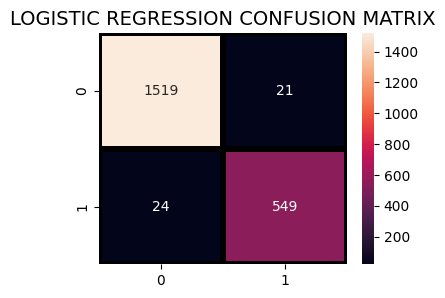

In [57]:
### Confusion Matrix

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, log_y_pred),
            annot=True, fmt = "d", linecolor="k", linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.show()